select subject session FOV

In [240]:
import BCI_analysis
import os
BCI_analysis.io_suite2p.get_canned_file_version()

'1.02'

In [3]:
BCI_analysis

<module 'BCI_analysis' from '/home/jupyter/Scripts/BCI_analysis/BCI_analysis/__init__.py'>

In [5]:
# import numpy as np
# data = np.load(os.path.join(save_path,'BCI_58-070323.npy'),allow_pickle = True).tolist()

In [234]:
#import BCI_analysis, os
local_temp_dir = '/home/jupyter/temp/' 
metadata_dir = '/home/jupyter/bucket/Metadata/' 
raw_data_path ='/home/jupyter/bucket/Data/Calcium_imaging/raw/Bergamo-2P-Photostim/' 
suite2p_path = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/Bergamo-2P-Photostim/'
behavior_data_path = '/home/jupyter/bucket/Data/Behavior/BCI_exported/Bergamo-2P-Photostim/'
setup = 'Bergamo-2P-Photostim'#'DOM3-MMIMS'
save_path = "/home/jupyter/bucket/Data/Calcium_imaging/canned_sessions"
fov = None#'FOV_01'
subject = ['BCI_58','BCI_59','BCI_60','BCI_64','BCI_65']#
BCI_analysis.io_suite2p.generate_canned_sessions(suite2p_path,
                                                 raw_data_path,
                                                 behavior_data_path,
                                                 save_path,
                                                 overwrite=False,
                                                 mouse_list=subject,
                                                 fov_list=fov, 
                                                 session_list=None)




['FOV_01', 'FOV_02']
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/canned_sessions/BCI_58-070323.npy, and overwrite=False
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/canned_sessions/BCI_58-070523.npy, and overwrite=False
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/canned_sessions/BCI_58-070623.npy, and overwrite=False
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/canned_sessions/BCI_58-070723.npy, and overwrite=False
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/canned_sessions/BCI_58-071023.npy, and overwrite=False
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/canned_sessions/BCI_58-071123.npy, and overwrite=False
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/canned_sessions/BCI_58-071223.npy, and overwrite=False
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/canned_sessions/BCI_58-071323.npy, and overwrite=F

In [175]:
data_dict['BCI_1']

dict_keys(['F', 'Fraw', 'df_closedloop', 'centroidX', 'centroidY', 'Ftrace', 'trace_corr', 'dist', 'conditioned_neuron_coordinates', 'conditioned_neuron', 'reward_time', 'step_time', 'trial_start', 'lick_time', 'threshold_crossing_time'])

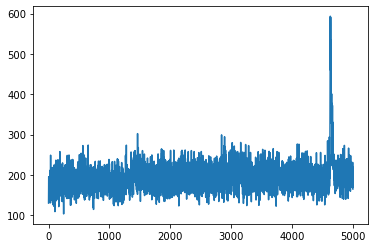

In [174]:
plt.plot(data_dict['BCI_1']['Ftrace'][0,:5000])

(array([404., 247.,  36.,   5.,   0.,   3.,   1.,   0.,   0.,   1.]),
 array([  24.360914,  316.21027 ,  608.05963 ,  899.909   , 1191.7583  ,
        1483.6077  , 1775.457   , 2067.3064  , 2359.1558  , 2651.0051  ,
        2942.8545  ], dtype=float32),
 <BarContainer object of 10 artists>)

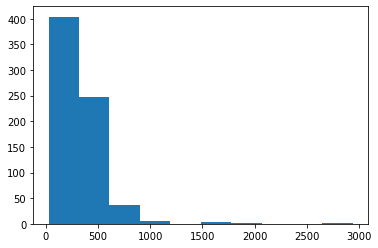

In [158]:
plt.hist(np.nanmax(data_dict['BCI_1']['Ftrace'],1))

In [235]:
import pandas as pd
metadata = {'filename':[],
           'mouse':[],
           'session':[],
           'fov':[],
           'neuron number':[],
           'spontaneous length (s)':[],
           'BCI_1 CN':[],
           'BCI_1 trial number':[],
           'BCI_1 hit rate':[],
           'BCI_2 CN':[],
           'BCI_2 trial number':[],
           'BCI_2 hit rate':[],
           'photostim group number':[],
           'photostim repeats per group':[]}
#generate metadata table
import numpy as np
files = os.listdir(save_path)
for file in files:
    if '.npy' not in file:
        continue
    data_dict = np.load(os.path.join(save_path,file),allow_pickle = True).tolist()
    if 'spont' in data_dict.keys():
        metadata['spontaneous length (s)'].append(int(data_dict['spont']['Ftrace'].shape[1] * data_dict['dt_si']))
    else:
        metadata['spontaneous length (s)'].append(0)
    metadata['filename'].append(file)
    metadata['mouse'].append(data_dict['mouse'])
    metadata['session'].append(data_dict['session'])
    metadata['fov'].append(data_dict['fov'])
    metadata['neuron number'].append(len(data_dict['iscell']))
    for k in ['BCI_1','BCI_2']:#,'BCI_3','BCI_4']:
        if k not in data_dict.keys():
            metadata['{} CN'.format(k)].append(None)
            metadata['{} trial number'.format(k)].append(None)
            metadata['{} hit rate'.format(k)].append(None)
        else:
            metadata['{} CN'.format(k)].append(data_dict[k]['conditioned_neuron'])
            metadata['{} trial number'.format(k)].append(data_dict[k]['F'].shape[2])
            metadata['{} hit rate'.format(k)].append(np.round(sum(data_dict[k]['reward_time'])/data_dict[k]['F'].shape[2],2))
    if 'photostim' in data_dict.keys():
        metadata['photostim group number'].append(data_dict['photostim']['favg'].shape[2])
        metadata['photostim repeats per group'].append(data_dict['photostim']['Fstim'].shape[2]/data_dict['photostim']['favg'].shape[2])
    else:
        metadata['photostim group number'].append(None)
        metadata['photostim repeats per group'].append(None)
df = pd.DataFrame(metadata)
df.to_csv(os.path.join(save_path,'metadata.csv'))

In [236]:
df

filename   mouse session     fov  neuron number  \
0   BCI_58-070323.npy  BCI_58  070323  FOV_01            507   
1   BCI_58-070523.npy  BCI_58  070523  FOV_01            507   
2   BCI_58-070623.npy  BCI_58  070623  FOV_01            507   
3   BCI_58-070723.npy  BCI_58  070723  FOV_01            507   
4   BCI_58-071023.npy  BCI_58  071023  FOV_01            507   
5   BCI_58-071123.npy  BCI_58  071123  FOV_01            507   
6   BCI_58-071223.npy  BCI_58  071223  FOV_01            507   
7   BCI_58-071323.npy  BCI_58  071323  FOV_01            507   
8   BCI_58-071823.npy  BCI_58  071823  FOV_02            693   
9   BCI_58-071923.npy  BCI_58  071923  FOV_02            693   
10  BCI_58-072023.npy  BCI_58  072023  FOV_02            693   
11  BCI_58-072123.npy  BCI_58  072123  FOV_02            693   
12  BCI_58-072223.npy  BCI_58  072223  FOV_02            693   
13  BCI_58-072323.npy  BCI_58  072323  FOV_02            693   
14  BCI_58-072423.npy  BCI_58  072423  FOV_02            693   
15  BCI_59-070323.npy  BCI_59  070323  FOV_01            502   
16  BCI_59-070523.npy  BCI_59  070523  FOV_01            502   
17  BCI_59-070623.npy  BCI_59  070623  FOV_01            502   
18  BCI_59-070723.npy  BCI_59  070723  FOV_01            502   
19  BCI_59-071123.npy  BCI_59  071123  FOV_02            192   
20  BCI_59-071223.npy  BCI_59  071223  FOV_02            192   
21  BCI_59-071323.npy  BCI_59  071323  FOV_02            192   
22  BCI_59-071823.npy  BCI_59  071823  FOV_03            317   
23  BCI_59-071923.npy  BCI_59  071923  FOV_03            317   
24  BCI_59-072023.npy  BCI_59  072023  FOV_03            317   
25  BCI_59-072123.npy  BCI_59  072123  FOV_03            317   
26  BCI_59-072223.npy  BCI_59  072223  FOV_03            317   
27  BCI_59-072323.npy  BCI_59  072323  FOV_03            317   
28  BCI_59-072423.npy  BCI_59  072423  FOV_03            317   
29  BCI_60-070323.npy  BCI_60  070323  FOV_01            633   
30  BCI_60-070523.npy  BCI_60  070523  FOV_01            633   
31  BCI_60-070623.npy  BCI_60  070623  FOV_01            633   
32  BCI_60-070723.npy  BCI_60  070723  FOV_01            633   
33  BCI_60-071023.npy  BCI_60  071023  FOV_01            633   
34  BCI_60-071123.npy  BCI_60  071123  FOV_01            633   
35  BCI_60-071223.npy  BCI_60  071223  FOV_01            633   
36  BCI_60-071323.npy  BCI_60  071323  FOV_01            633   
37  BCI_60-071823.npy  BCI_60  071823  FOV_02            504   
38  BCI_60-071923.npy  BCI_60  071923  FOV_02            504   
39  BCI_60-072023.npy  BCI_60  072023  FOV_02            504   
40  BCI_60-072123.npy  BCI_60  072123  FOV_02            504   
41  BCI_60-072223.npy  BCI_60  072223  FOV_02            504   
42  BCI_60-072323.npy  BCI_60  072323  FOV_02            504   
43  BCI_60-072423.npy  BCI_60  072423  FOV_02            504   
44  BCI_64-072123.npy  BCI_64  072123  FOV_01            657   
45  BCI_64-072223.npy  BCI_64  072223  FOV_01            657   
46  BCI_64-072323.npy  BCI_64  072323  FOV_01            657   
47  BCI_65-072123.npy  BCI_65  072123  FOV_01            847   
48  BCI_65-072223.npy  BCI_65  072223  FOV_01            847   
49  BCI_65-072323.npy  BCI_65  072323  FOV_01            847   

    spontaneous length (s)  BCI_1 CN  BCI_1 trial number  BCI_1 hit rate  \
0                      205        64                  99            0.53   
1                      277        64                  72            0.47   
2                      331        63                  30            1.00   
3                      221       407                  34            0.79   
4                      224        27                  35            0.91   
5                      193        66                  37            0.84   
6                      252        77                  49            0.49   
7                      244       158                  53            0.45   
8                      224        36                 117        

In [241]:
# test canned sessions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
df = pd.read_csv(os.path.join(save_path,'metadata.csv'))

In [248]:
filename

[array([ 83.57148204, 249.78989223,  33.0844282 , 375.20341194,
        297.32562938,  69.65519984,  50.26938909, 237.88728287,
        299.53851641, 446.67663871, 276.28925894,  73.37809258,
        384.74936726, 501.37538524,   5.92250641, 120.3719131 ,
        114.68045866, 302.18188932,  80.90839893, 305.65378349,
        153.91384376, 450.2113264 , 151.90573133, 114.12464924,
         12.95499046, 437.62216102, 303.98927144,  49.04586767,
         35.68410694, 128.23212079,  47.71027506, 311.81677171,
         18.53565269,  53.1323286 ,  91.44152492, 176.16570692,
        144.25742198, 483.09776542,  51.16780275, 102.80156733,
        233.03030339, 419.9177705 , 108.58233051, 284.90037934,
         66.56567561,  17.28604599,   5.23028723, 300.02152862,
        188.34402402, 206.75616382, 119.07288924, 106.93162493,
        206.58089624, 125.52825609, 363.26802938, 116.67714095,
        329.45186889,  34.42607887, 153.67052753,  32.72845924,
        362.89809153, 189.68052616, 515.

/tmp/ipykernel_26510/638652221.py:148: RuntimeWarning: Mean of empty slice
  ax_cn_plot.errorbar(np.arange(7)-3,np.nanmean(norm_direct_amplitudes_cn,0),np.nanstd(norm_direct_amplitudes_cn,0),color = 'black',linewidth = 6)
/tmp/ipykernel_26510/638652221.py:149: RuntimeWarning: Mean of empty slice
  ax_cn_plot.plot(np.arange(len(norm_da_))-3,np.nanmean(norm_direct_amplitudes_cn,0),'k-',linewidth = 6)
/tmp/ipykernel_26510/638652221.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize = [15,20])


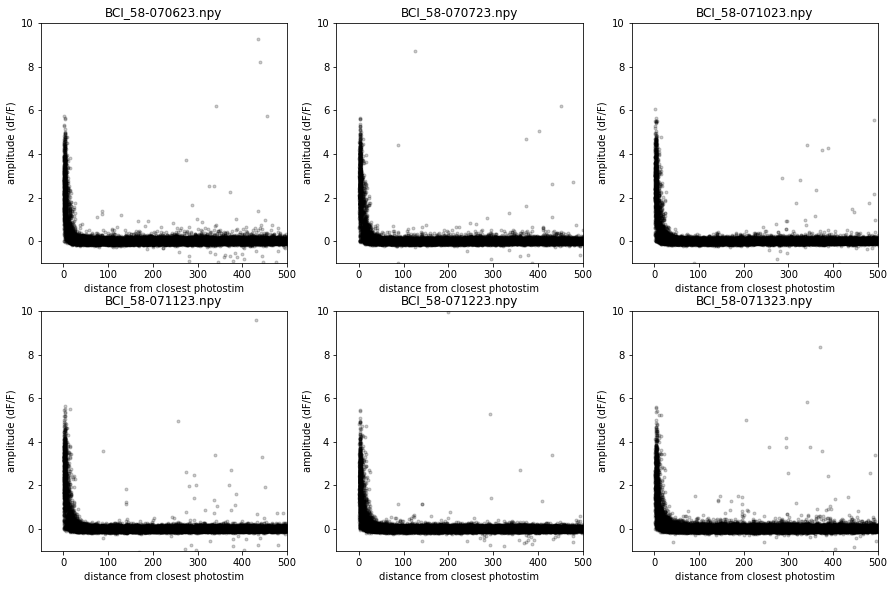

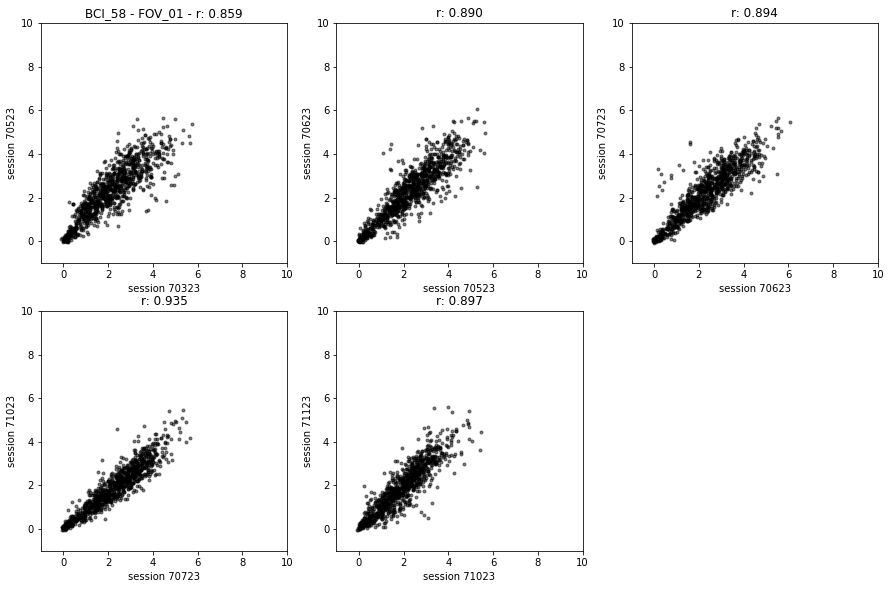

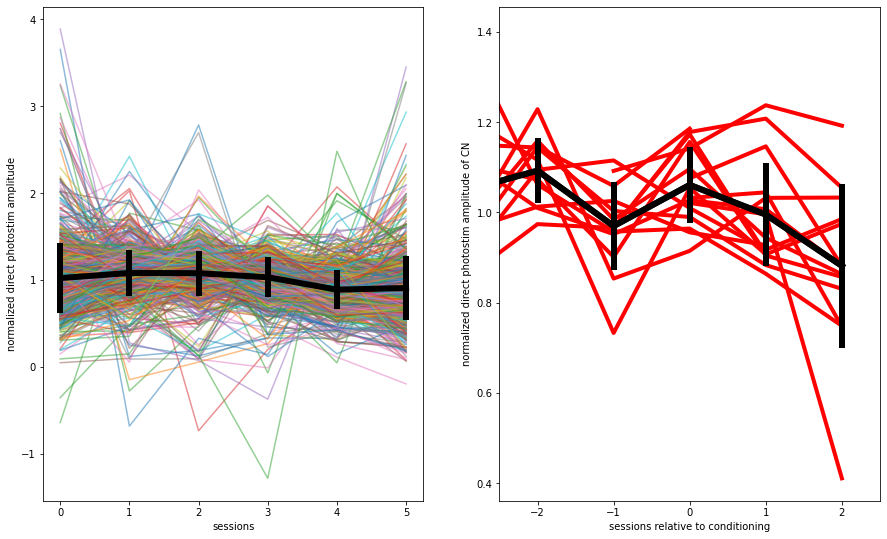

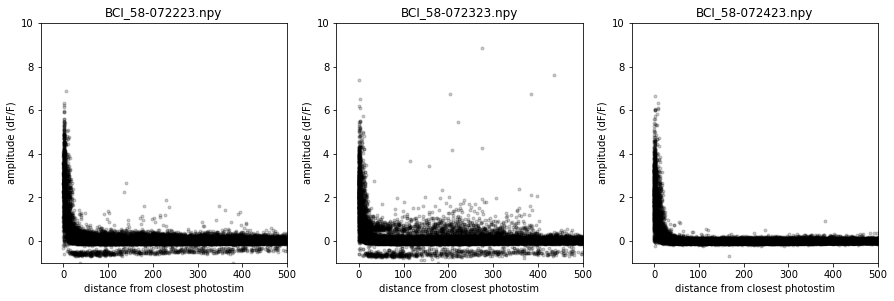

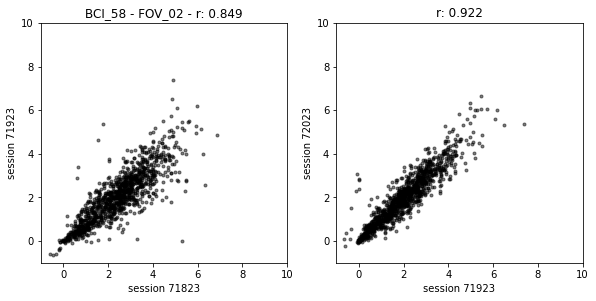

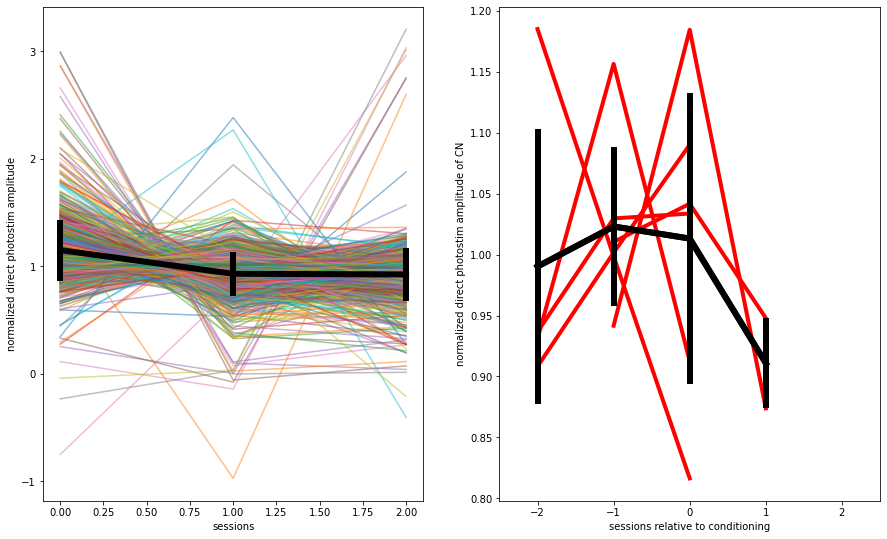

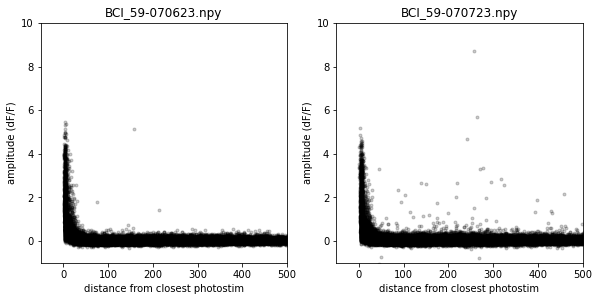

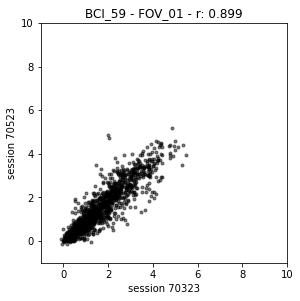

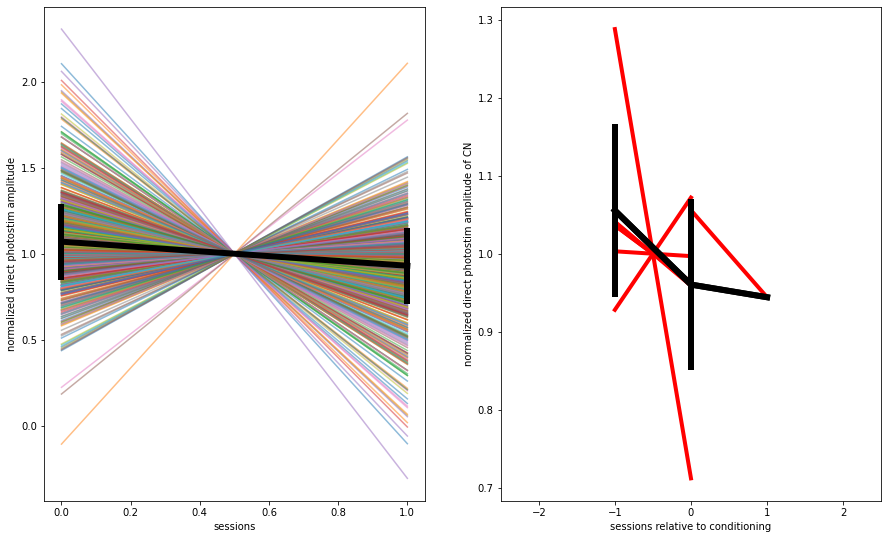

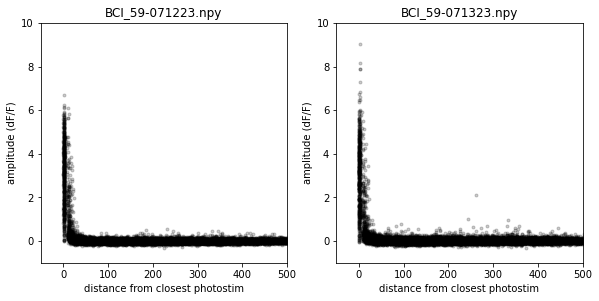

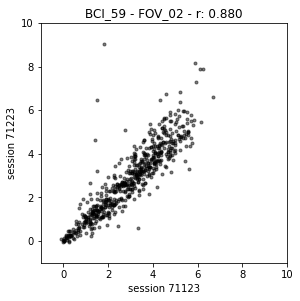

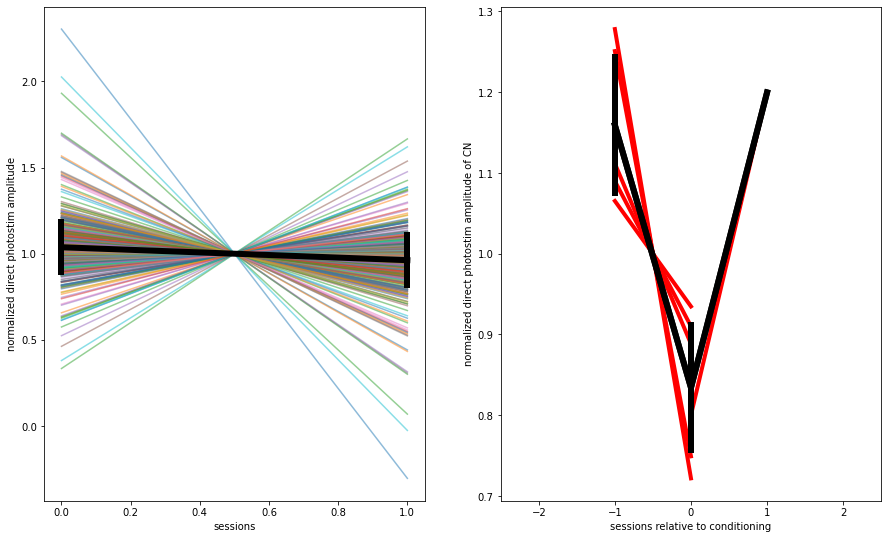

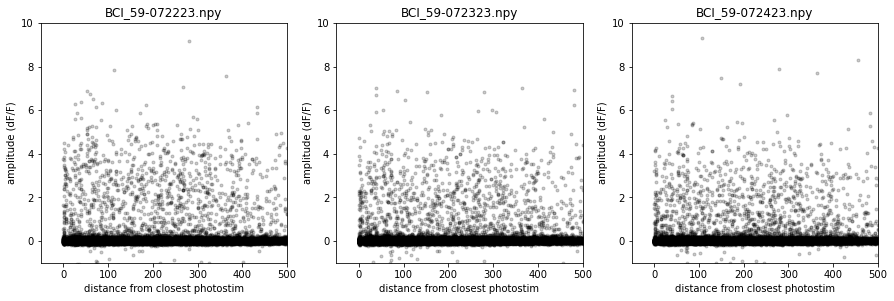

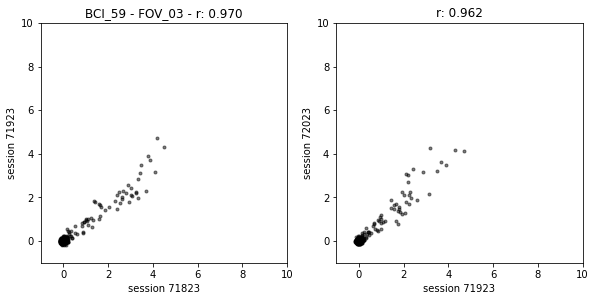

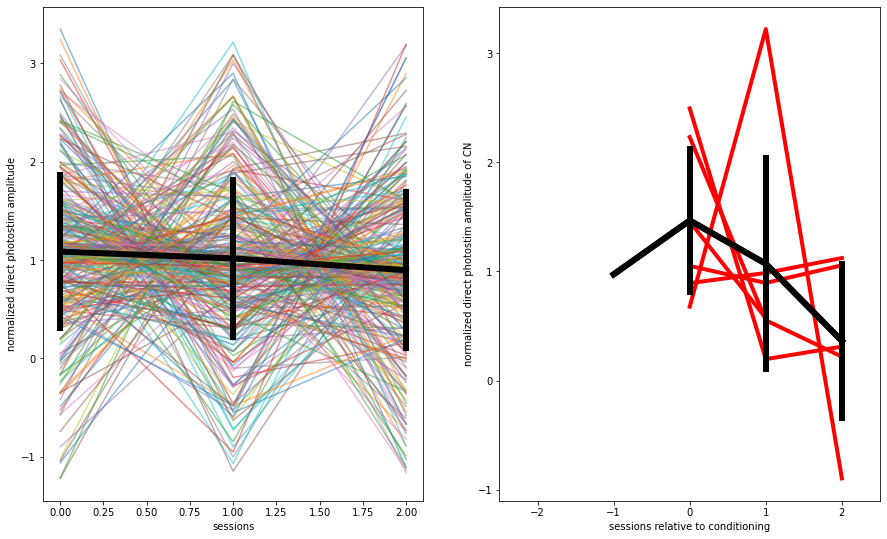

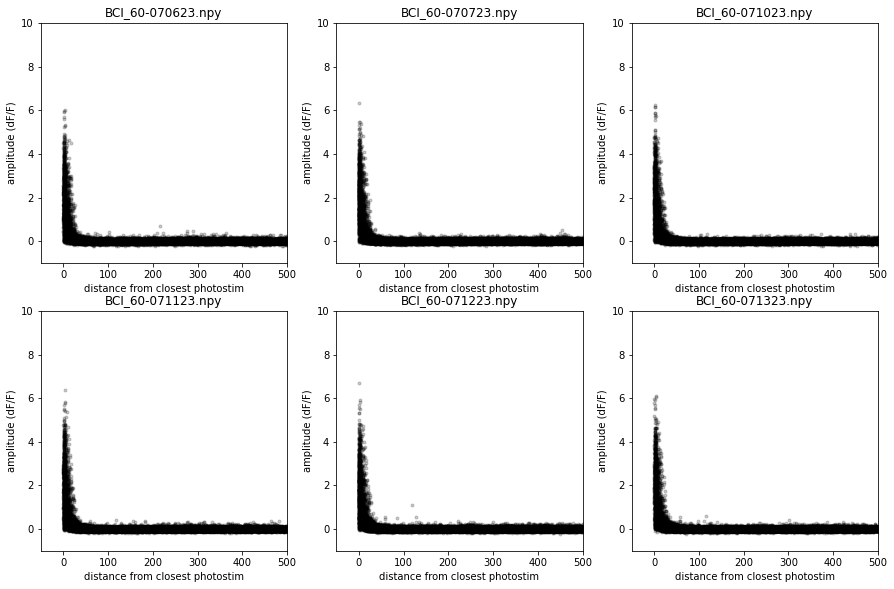

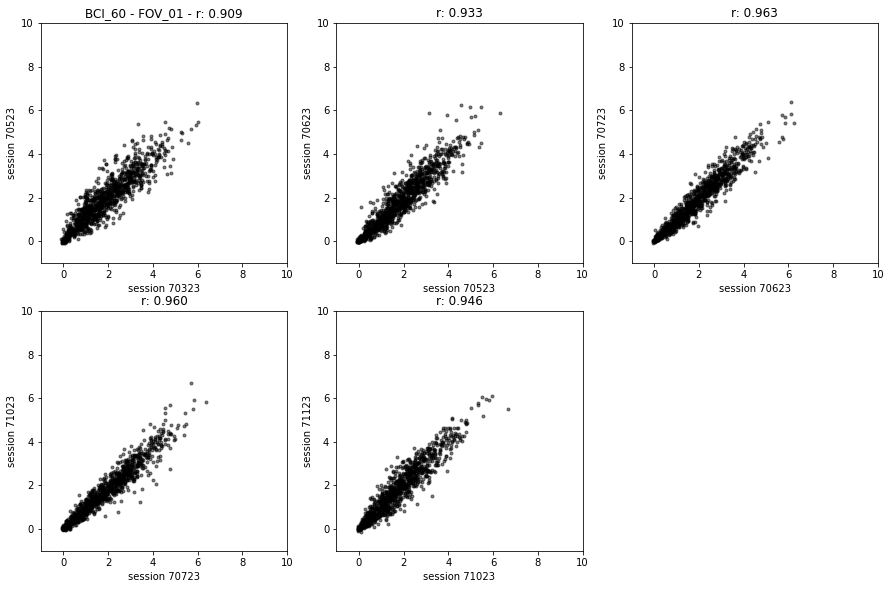

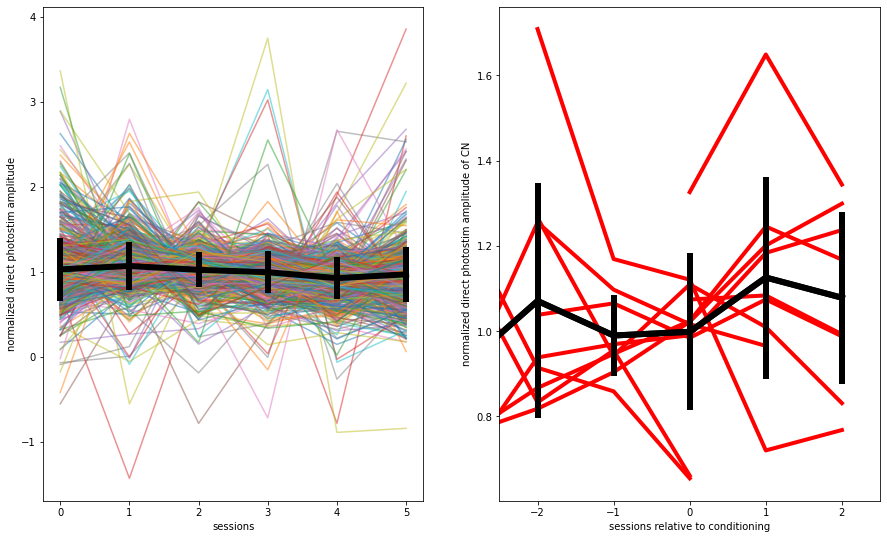

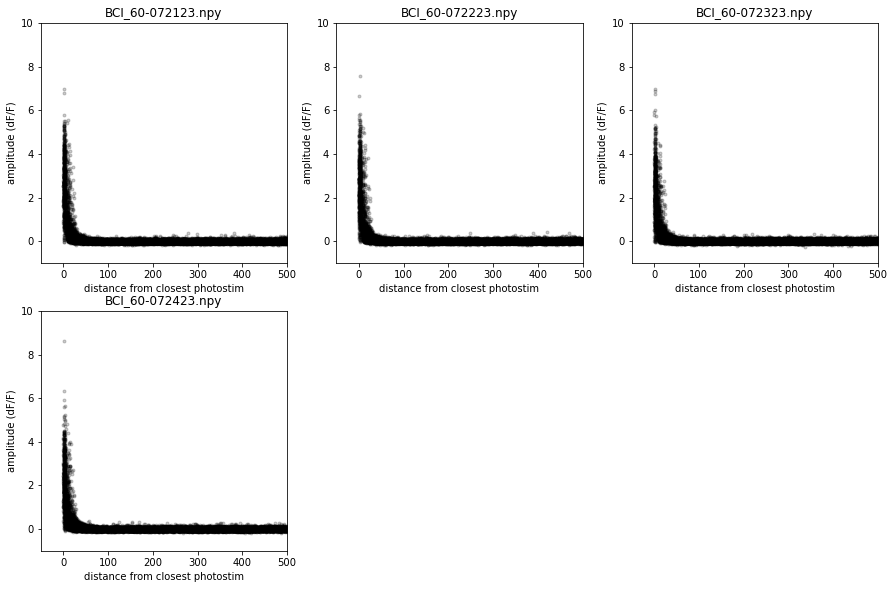

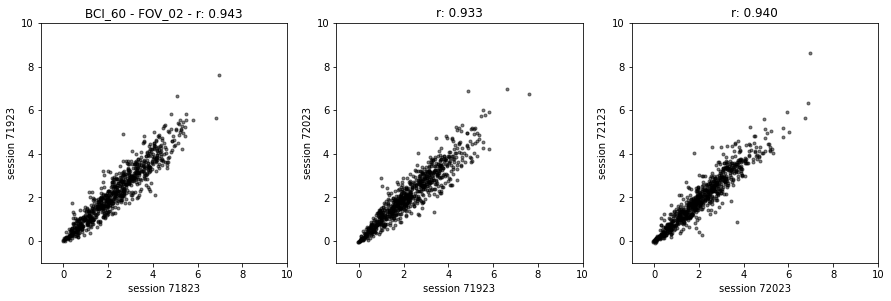

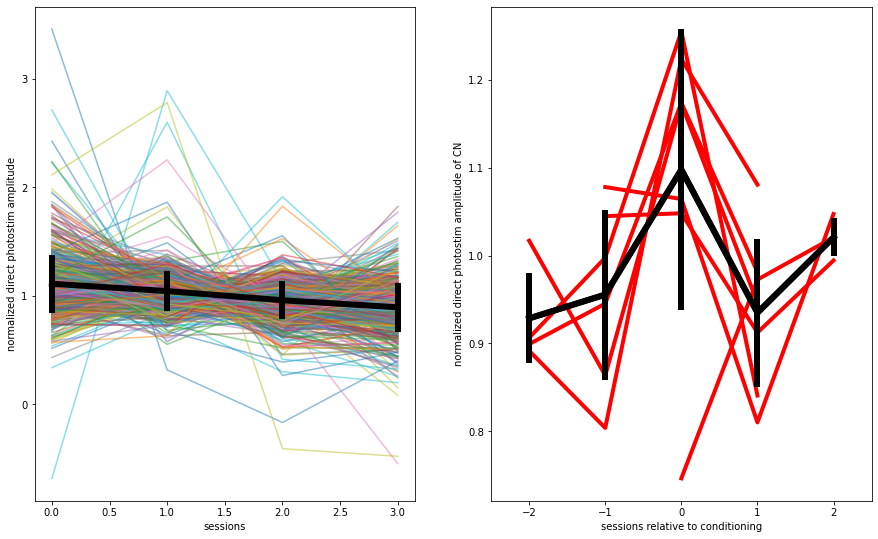

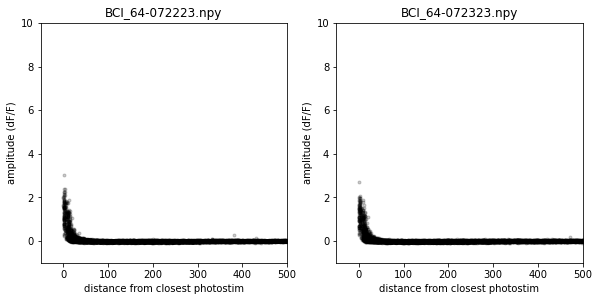

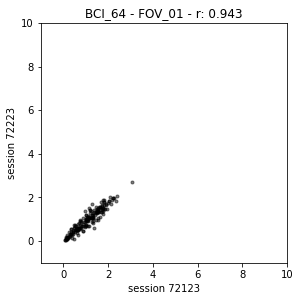

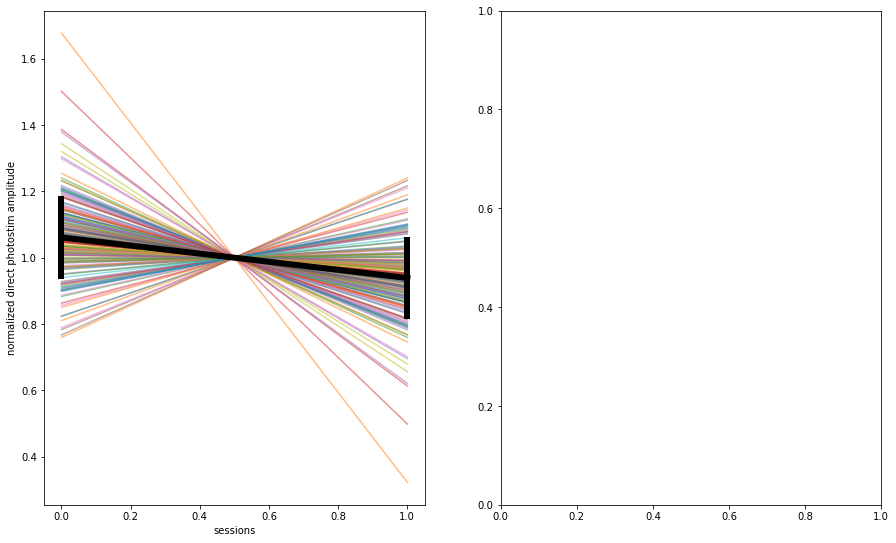

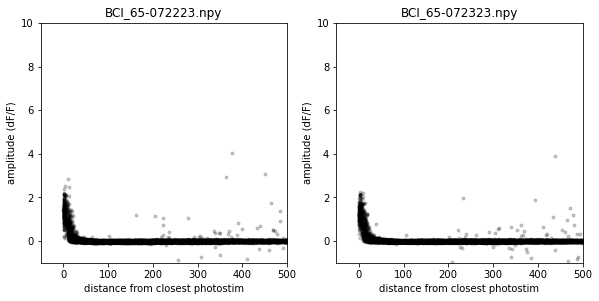

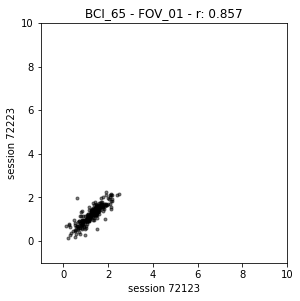

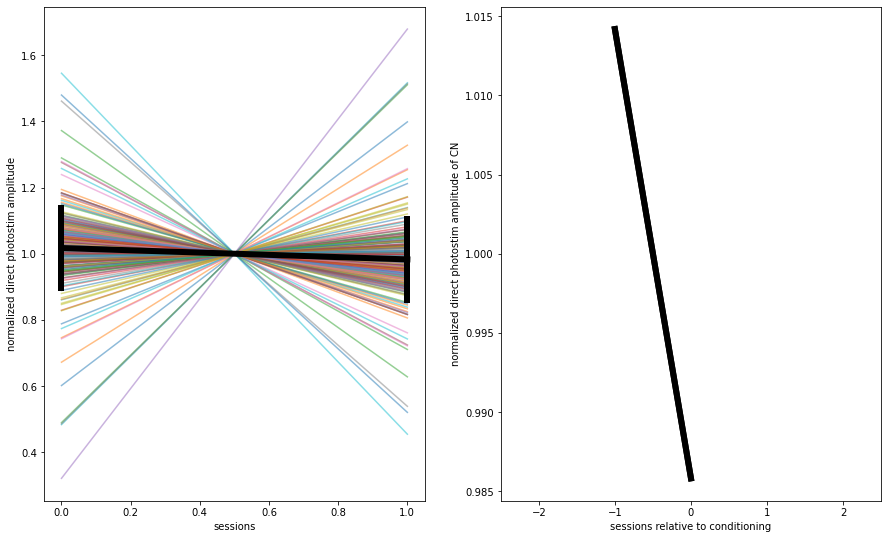

In [257]:
max_direct_photostim_dist = 10

for subject in df.mouse.unique():
    for fov in df.loc[df.mouse == subject].fov.unique():
        df_sessions = df.loc[(df.mouse == subject) & (df.fov == fov)]
        direct_photostim_amplitudes = []
        fov_direct_amplitudes_m1 = []
        fov_direct_amplitudes_p1 = []
        fov_direct_amplitudes = []
        fov_all_amplitudes = []
        fov_all_amplitudes_m1 = []
        fov_all_amplitudes_p1 = []
        fov_all_distances = []
        fov_filenames = []
        fov_cn_list = []
        for session, filename,df_now  in zip(df_sessions.session,df_sessions.filename,df_sessions.iterrows()):
            
            data_dict = np.load(os.path.join(save_path,filename),allow_pickle = True).tolist()
            if df_now[1]['photostim group number']>0:
                direct_amplitudes = []
                direct_amplitudes_m1 = []
                direct_amplitudes_p1 = []
                all_amplitudes = []
                all_distances = []
                all_amplitudes_m1 = []
                all_amplitudes_p1 = []
                for offset in [-1,0,1]:
                    for pg in np.unique(data_dict['photostim']['seq']):
                        pidx = np.roll(data_dict['photostim']['seq'],offset) == pg
                        Fstim_now = np.nanmean(data_dict['photostim']['Fstim'][:,:,pidx],2)
                        indirect_cells = data_dict['photostim']['stimDist'][:,pg-1]>max_direct_photostim_dist
                        amplitudes = np.nanmean(Fstim_now[9:15,:],0)-np.nanmean(Fstim_now[:3,:],0)
                        amplitudes_direct = amplitudes.copy()
                        amplitudes_direct[indirect_cells] = np.nan
                        if offset == 0:
                            direct_amplitudes.append(amplitudes_direct)
                            all_amplitudes.append(amplitudes)
                            all_distances.append(data_dict['photostim']['stimDist'][:,pg-1])
                        elif offset == -1:
                            all_amplitudes_m1.append(amplitudes)
                            direct_amplitudes_m1.append(amplitudes_direct)
                        elif offset == 1:
                            all_amplitudes_p1.append(amplitudes)
                            direct_amplitudes_p1.append(amplitudes_direct)
                    

                fov_direct_amplitudes.append(direct_amplitudes)
                fov_direct_amplitudes_m1.append(direct_amplitudes_m1)
                fov_direct_amplitudes_p1.append(direct_amplitudes_p1)
                
                fov_all_amplitudes_m1.append(all_amplitudes_m1)
                fov_all_amplitudes_p1.append(all_amplitudes_p1)
                
                fov_all_amplitudes.append(all_amplitudes)
                fov_all_distances.append(all_distances)
                fov_filenames.append(filename)
                try:
                    fov_cn_list.append(data_dict['BCI_3']['conditioned_neuron'])
                except:
                    try:
                        fov_cn_list.append(data_dict['BCI_2']['conditioned_neuron'])
                    except:
                        try:
                            fov_cn_list.append(data_dict['BCI_1']['conditioned_neuron'])
                        except:
                            pass
        fig = plt.figure(figsize = [15,15])
        for i,(a1,d1,f1) in enumerate(zip(fov_all_amplitudes,fov_all_distances,fov_filenames)):
            ax = fig.add_subplot(3,3,i+1)
            y,x = np.concatenate(a1),np.concatenate(d1)
            ax.plot(x,y,'k.',alpha = .2)
            ax.set_xlim([-50,500])
            ax.set_ylim([-1,10])
            ax.set_xlabel('distance from closest photostim')
            ax.set_ylabel('amplitude (dF/F)')
            ax.set_title(f1)
        #     ax.plot(x,np.concatenate(fov_all_amplitudes_m1[i]),'b.',alpha = .5)
        #     ax.plot(x,np.concatenate(fov_all_amplitudes_p1[i]),'r.',alpha = .5)
        # #asd#
            
        fig = plt.figure(figsize = [15,15])
        for i,(a1,a2,f1,f2) in enumerate(zip(fov_direct_amplitudes[:-1],fov_direct_amplitudes[1:],fov_filenames[:-1],fov_filenames[1:])):
            
            ax = fig.add_subplot(3,3,i+1)
            x,y = np.concatenate(a1),np.concatenate(a2)
            needed = (np.isnan(x)== False) & (np.isnan(y)== False)
            r = scipy.stats.pearsonr(x[needed],y[needed])    
            ax.plot(np.concatenate(a1),np.concatenate(a2),'k.',alpha = .5)
            if r[0]<.8:
                # ax.plot(np.concatenate(a1),np.concatenate(fov_direct_amplitudes_m1[i+1]),'b.',alpha = .5)
                # ax.plot(np.concatenate(a1),np.concatenate(fov_direct_amplitudes_p1[i+1]),'r.',alpha = .5)
                ax.plot(np.concatenate(fov_direct_amplitudes_m1[i]),np.concatenate(a2),'b.',alpha = .5)
                ax.plot(np.concatenate(fov_direct_amplitudes_p1[i]),np.concatenate(a2),'r.',alpha = .5)
                print(fov_filenames[i+1])
                
            ax.set_xlabel('session {}'.format(df_sessions.session.values[i]))
            ax.set_ylabel('session {}'.format(df_sessions.session.values[i+1]))
            plt.xlim([-1,10])
            plt.ylim([-1,10])
            
            if i == 0:
                ax.set_title('{} - {} - r: {:.3f}'.format(subject,fov,r[0]))
            else:
                ax.set_title('r: {:.3f}'.format(r[0]))
        fig = plt.figure(figsize = [15,20])
        ax_direct_stability = fig.add_subplot(2,2,1)
        ax_cn_plot = fig.add_subplot(2,2,2)

        fov_direct_amplitudes = np.asarray(fov_direct_amplitudes)
        group,cell = np.where(np.sum(np.isnan(fov_direct_amplitudes),0)==0)
        norm_direct_amplitudes = []
        norm_direct_amplitudes_cn = []
        #asdsa
        for g,c in zip(group,cell):
            amplitude_vector = fov_direct_amplitudes[:,g,c]
            if np.nanmean(amplitude_vector)-np.nanstd(amplitude_vector)/np.sqrt(len(amplitude_vector))<=0:
                continue
            # if np.nanmean(amplitude_vector)<.5:
            #     continue
            norm_da = amplitude_vector/np.nanmean(amplitude_vector)
            ax_direct_stability.plot(norm_da,'-',alpha = .5)
            norm_direct_amplitudes.append(norm_da)
            if c in fov_cn_list:
                session_idx = np.where(fov_cn_list == c)[0][0]

                #norm_da = np.roll(np.concatenate([[np.nan],amplitude_vector,[np.nan]])/np.nanmean(amplitude_vector[session_idx]),-session_idx+2)
                norm_da = amplitude_vector/np.nanmean(amplitude_vector)#/np.nanmean(amplitude_vector[session_idx])
                norm_da_ = np.ones(7)*np.nan
                steps_forward = np.min([len(norm_da)-session_idx,3])
                norm_da_[3:3+steps_forward] = norm_da[session_idx:session_idx+steps_forward]
                steps_back = np.min([session_idx,3])
                norm_da_[3-steps_back:3] = norm_da[session_idx-steps_back:session_idx]
                norm_da = norm_da_
                #norm_da = np.roll(np.concatenate([[np.nan],amplitude_vector,[np.nan]]),-session_idx+2)
                norm_direct_amplitudes_cn.append(norm_da)
                ax_cn_plot.plot(np.arange(len(norm_da))-3,norm_da,'r-',alpha = 1,linewidth = 4)
                # if session_idx>0:
                #     asd
                #ax_direct_stability.plot(session_idx,norm_da[session_idx],'ro',alpha = 1,markersize = 16)

        norm_direct_amplitudes = np.asarray(norm_direct_amplitudes)
        norm_direct_amplitudes_cn = np.asarray(norm_direct_amplitudes_cn)
        ax_direct_stability.errorbar(np.arange(fov_direct_amplitudes.shape[0]),np.nanmean(norm_direct_amplitudes,0),np.nanstd(norm_direct_amplitudes,0),color = 'black',linewidth = 6)
        ax_direct_stability.plot(np.nanmean(norm_direct_amplitudes,0),'k-',linewidth = 2)
        ax_direct_stability.set_xlabel('sessions')
        ax_direct_stability.set_ylabel('normalized direct photostim amplitude')
        if len(norm_direct_amplitudes_cn)>0:
            ax_cn_plot.errorbar(np.arange(7)-3,np.nanmean(norm_direct_amplitudes_cn,0),np.nanstd(norm_direct_amplitudes_cn,0),color = 'black',linewidth = 6)
            ax_cn_plot.plot(np.arange(len(norm_da_))-3,np.nanmean(norm_direct_amplitudes_cn,0),'k-',linewidth = 6)
            ax_cn_plot.set_xlabel('sessions relative to conditioning')
            ax_cn_plot.set_ylabel('normalized direct photostim amplitude of CN')
            ax_cn_plot.set_xlim([-2.5,2.5])
           # print()
            

            
        
        
            #pass


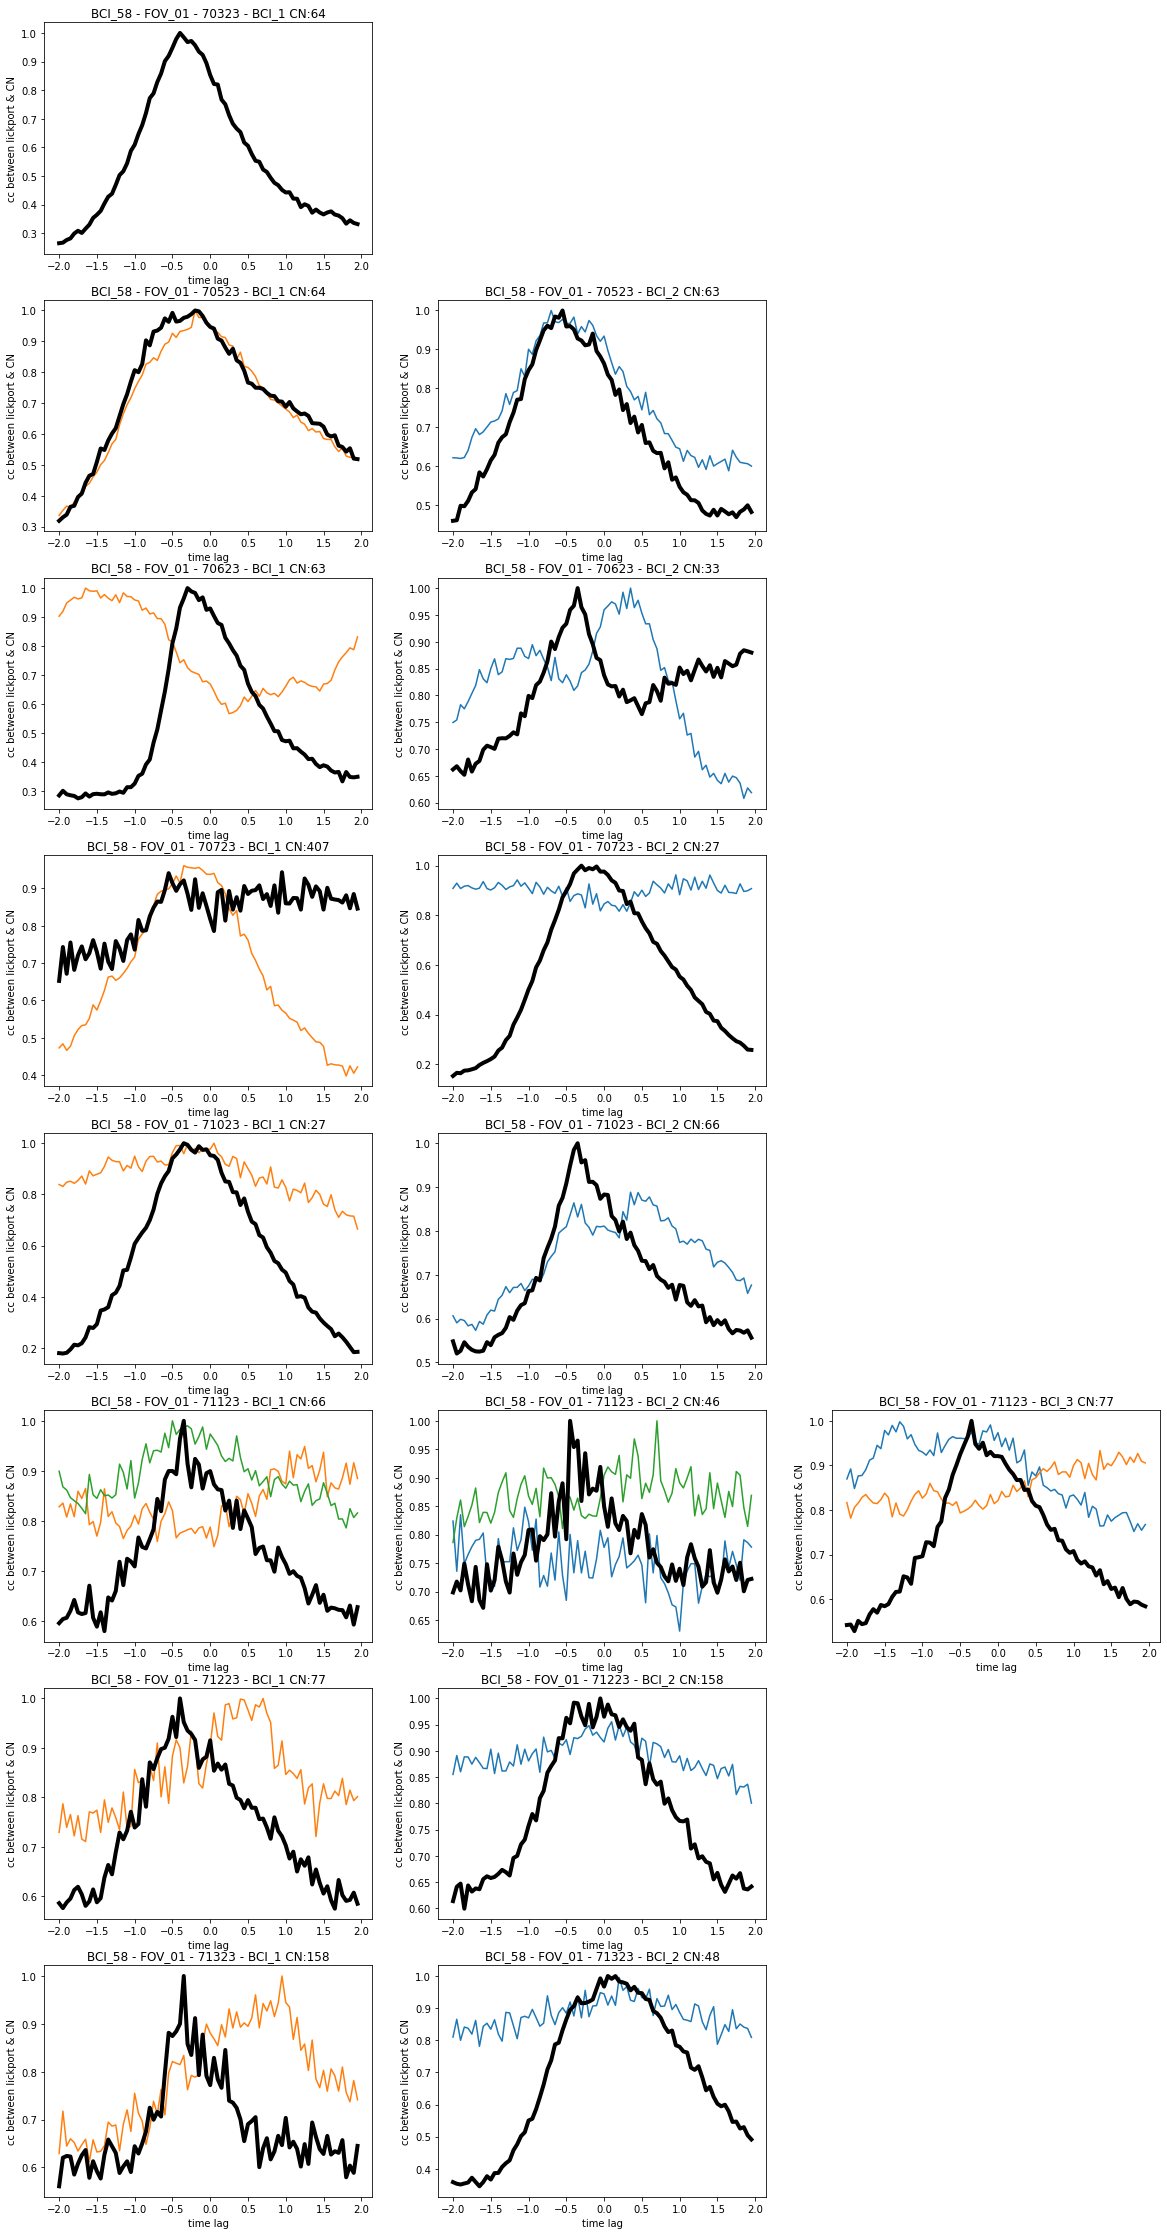

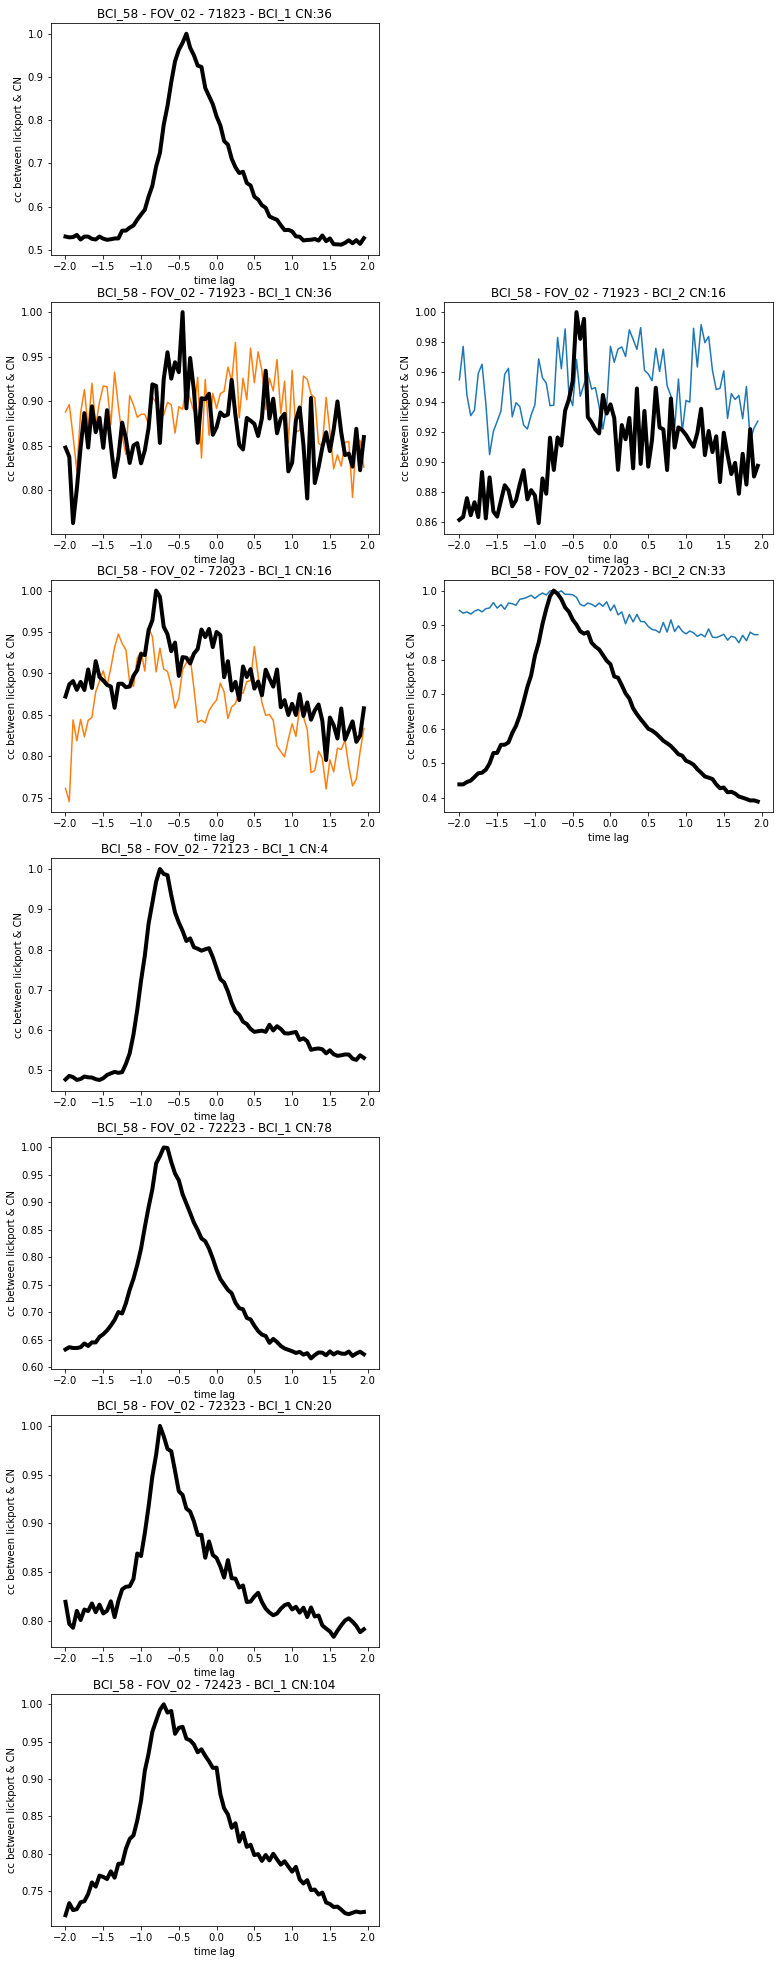

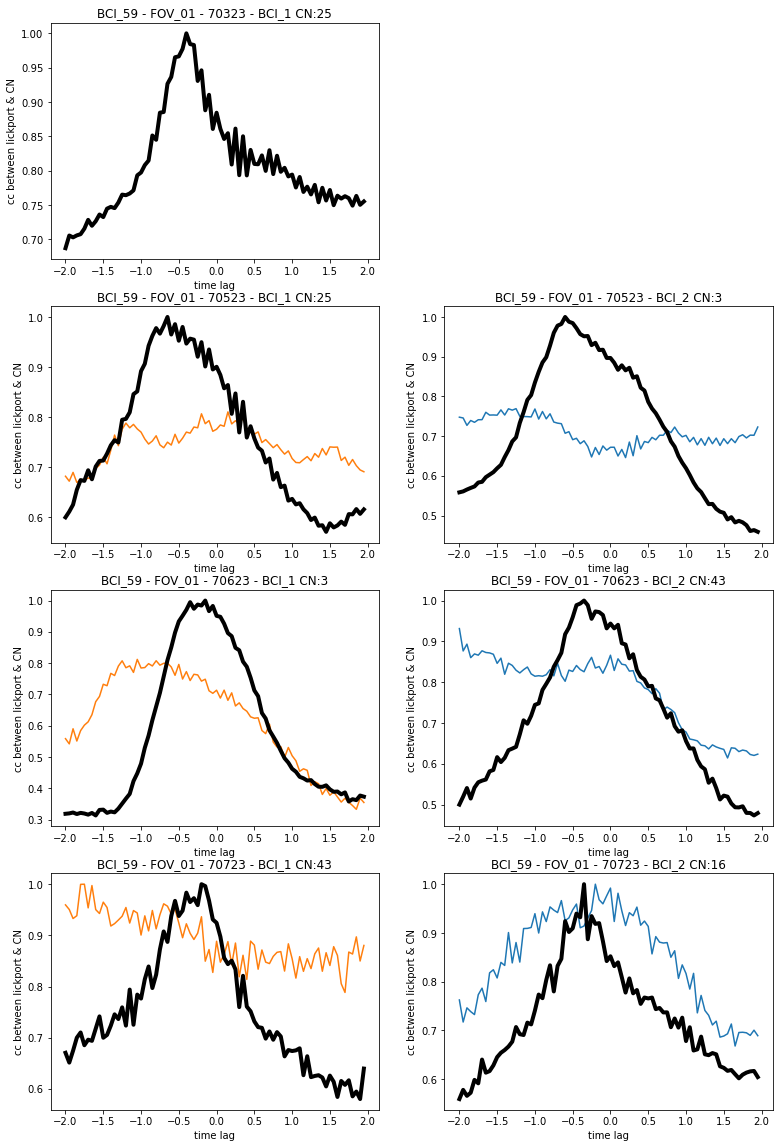

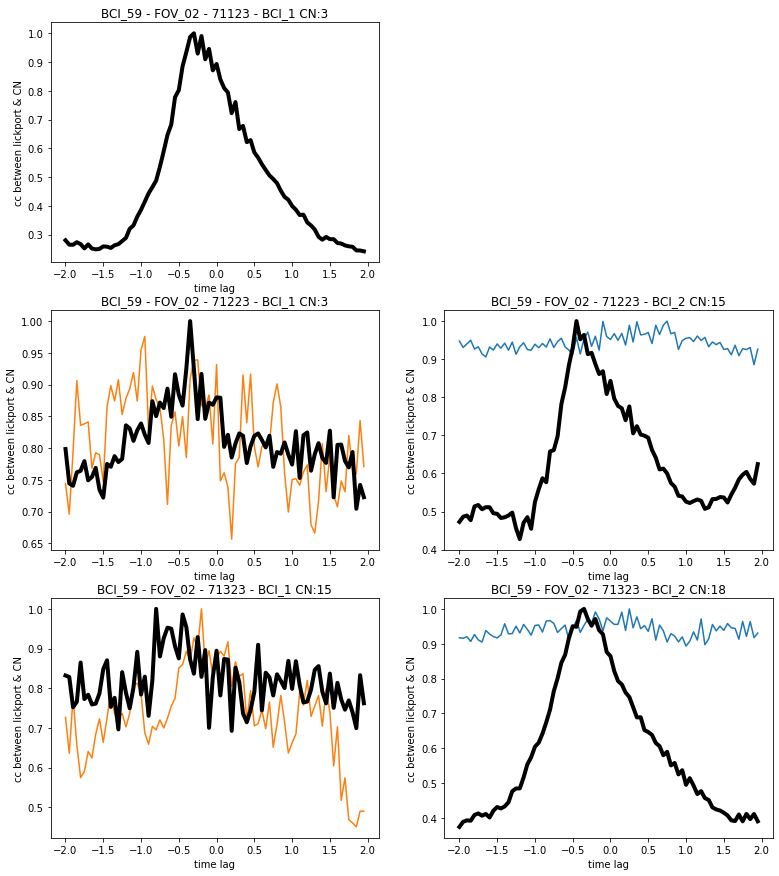

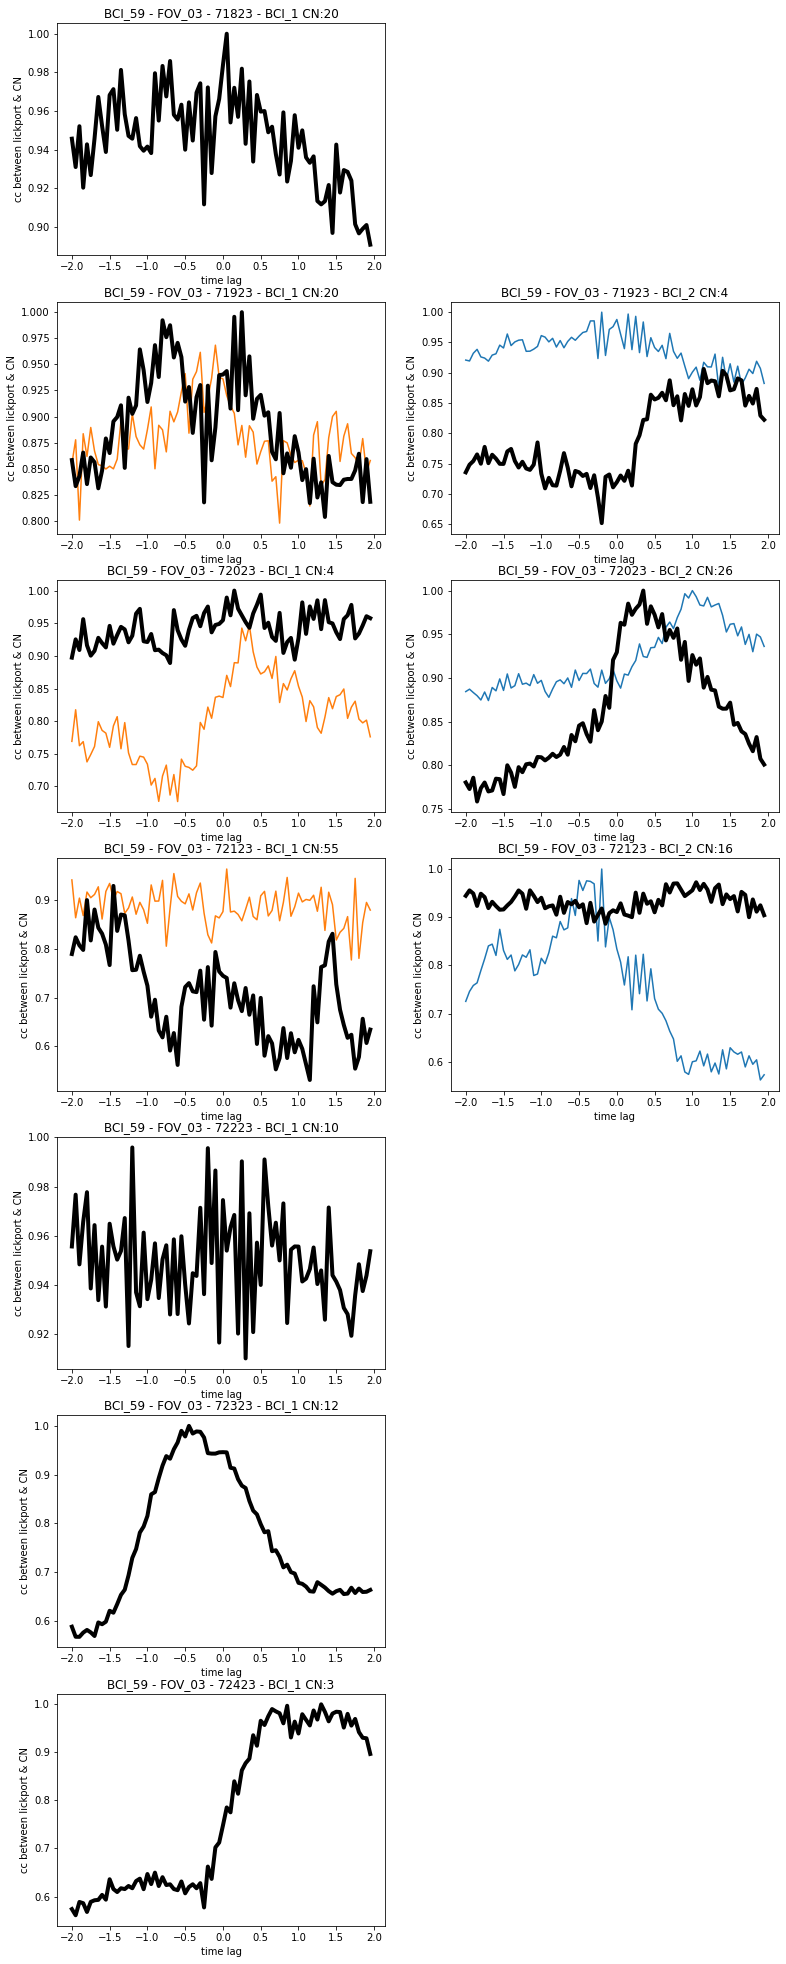

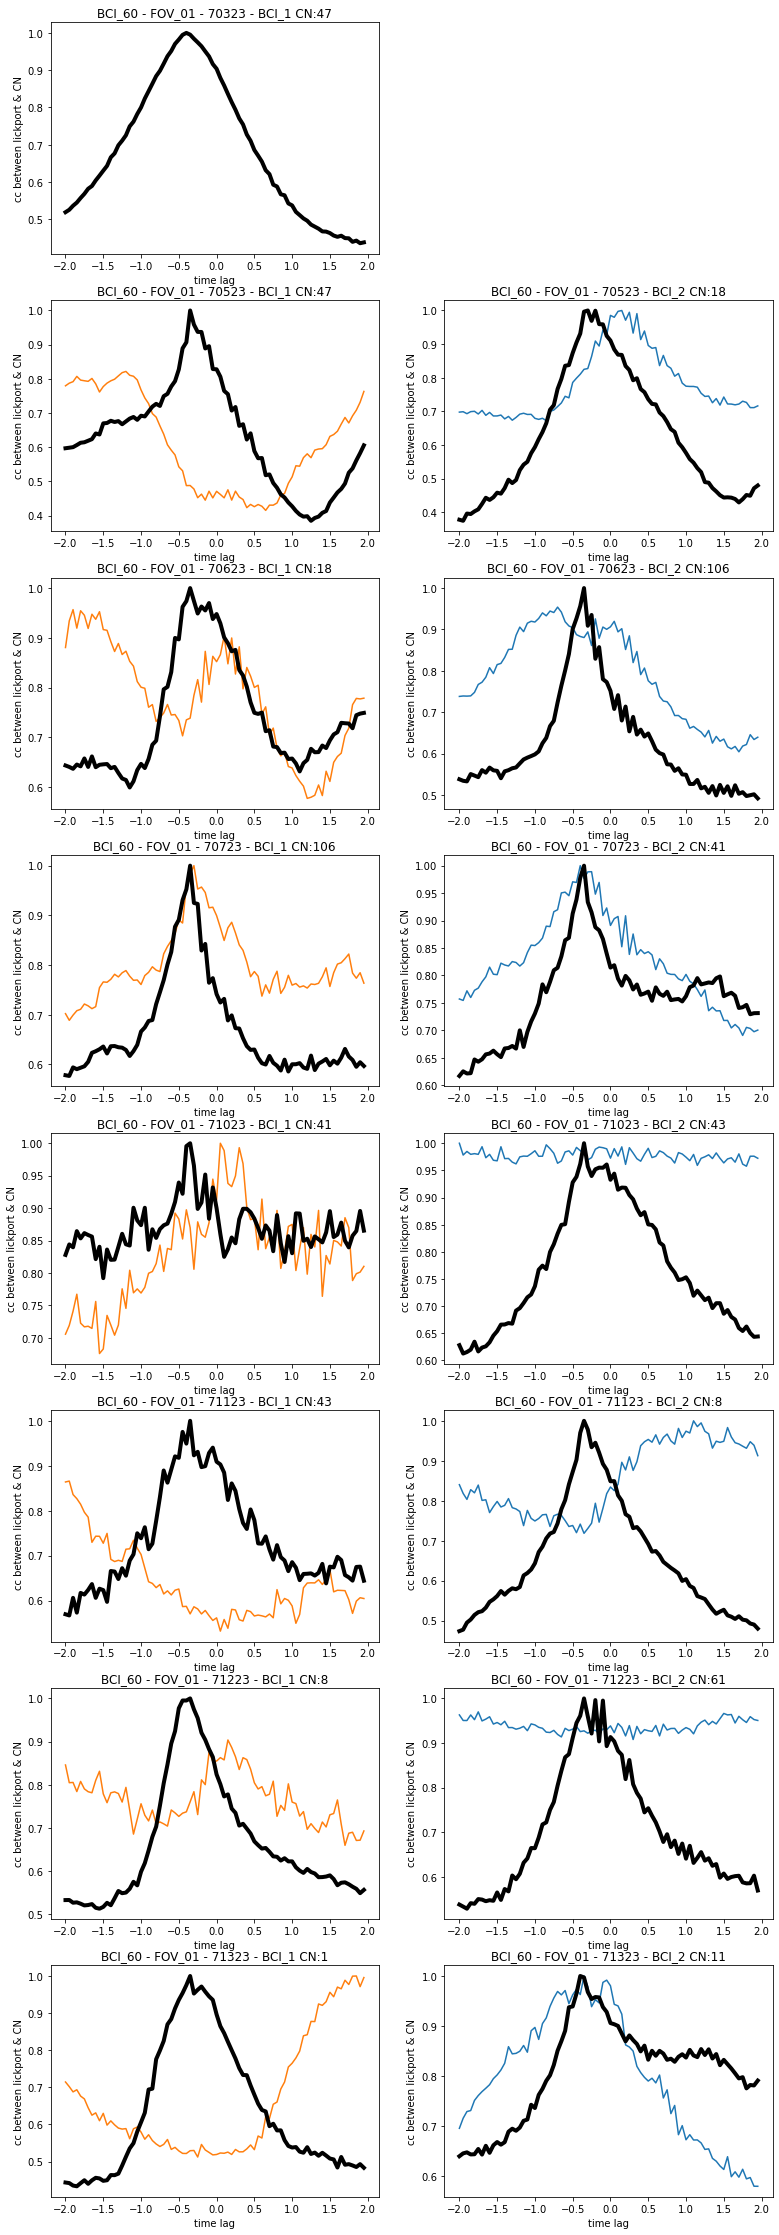

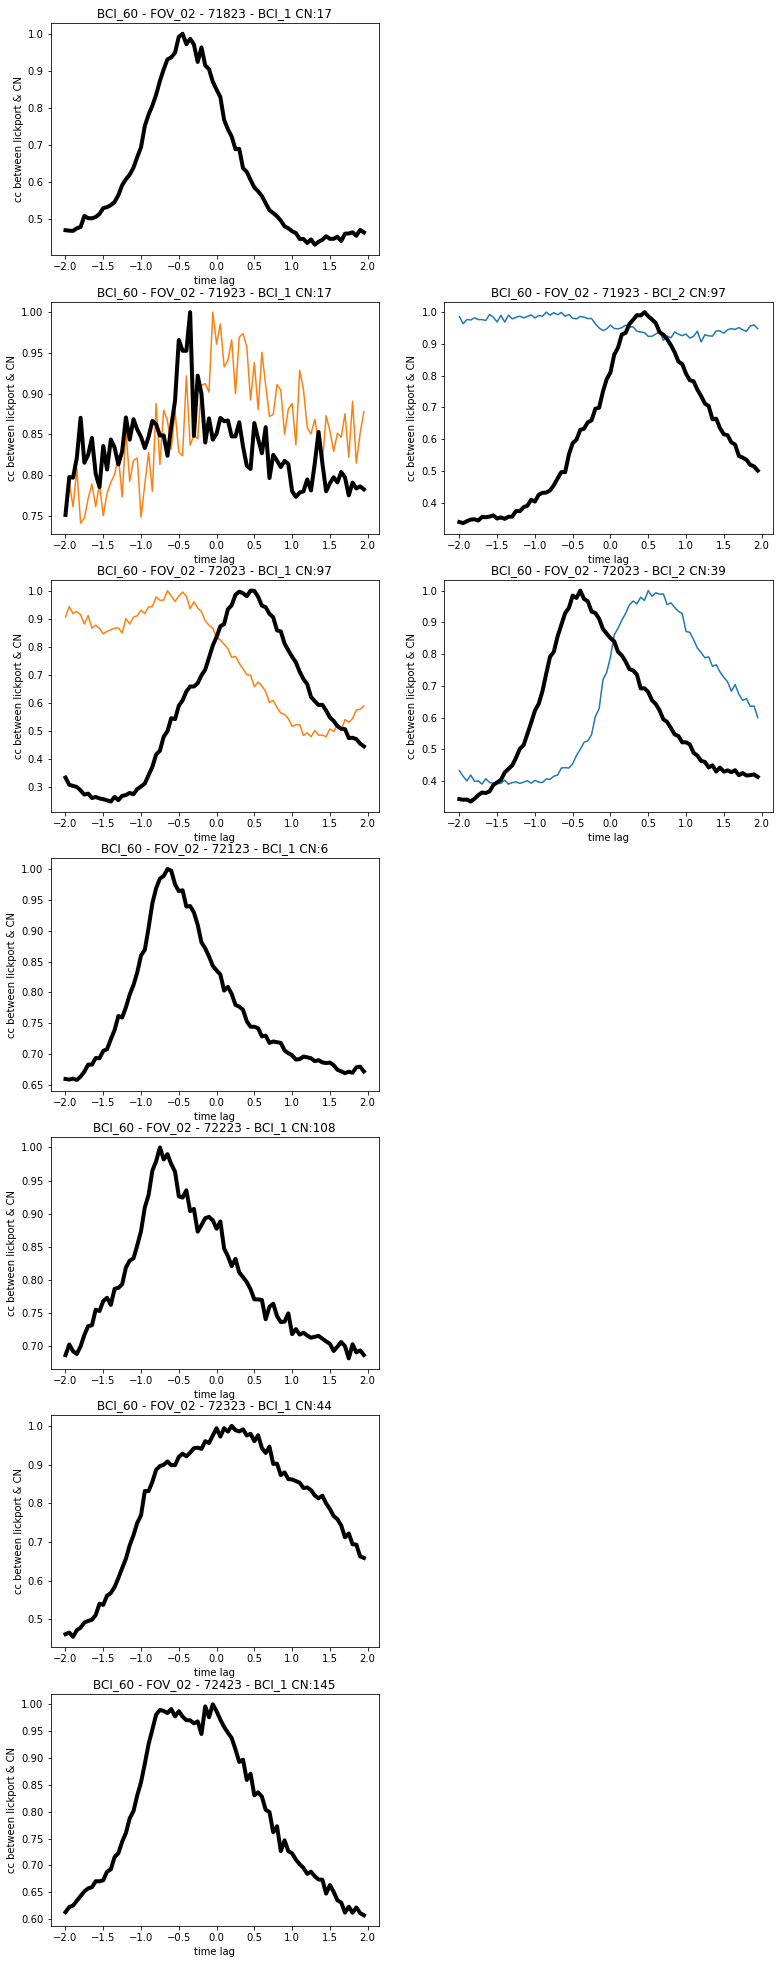

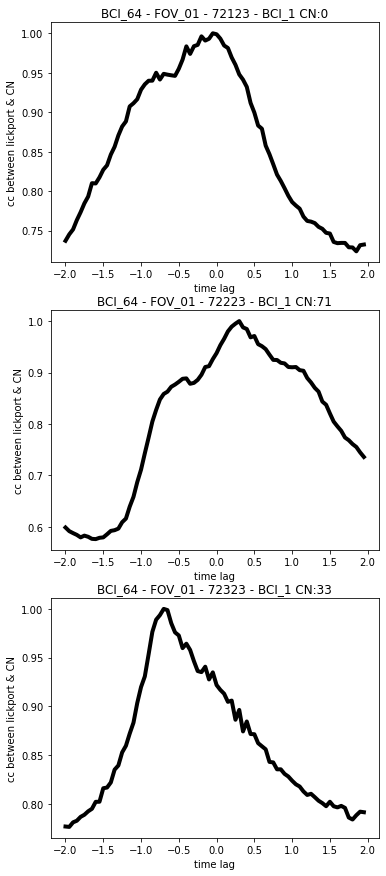

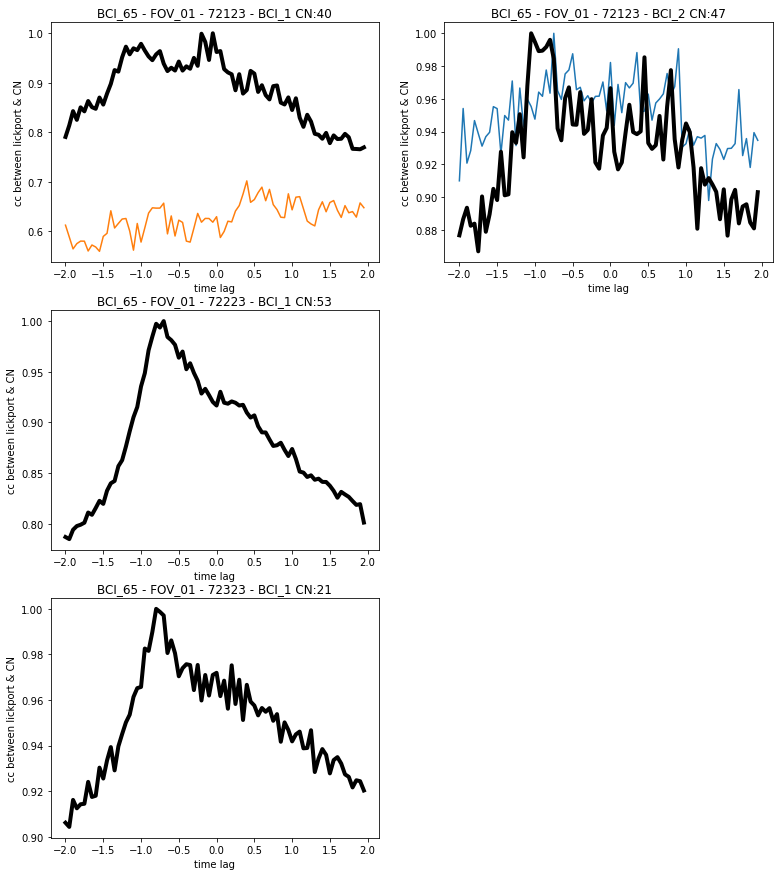

In [239]:

#Check if the CN is indeed activated before each reward, and if its correlated with lickport steps
step_len = 40
time_vector = np.arange(-step_len,step_len,1)/20

for subject in df.mouse.unique():
    for fov_i,fov in enumerate(df.loc[df.mouse == subject].fov.unique()):
        df_sessions = df.loc[(df.mouse == subject) & (df.fov == fov)]
        fig = plt.figure(figsize = [20,5*len(df_sessions.session)])
        plot_counter =0
        
        direct_photostim_amplitudes = []
        fov_direct_amplitudes_m1 = []
        fov_direct_amplitudes_p1 = []
        fov_direct_amplitudes = []
        fov_filenames = []
        for session_i,(session, filename,df_now)  in enumerate(zip(df_sessions.session,df_sessions.filename,df_sessions.iterrows())):
            
            data_dict = np.load(os.path.join(save_path,filename),allow_pickle = True).tolist()
            cn_list = []
            for bci_counter in range(10):
                if 'BCI_{}'.format(bci_counter) not in data_dict.keys():
                    continue
                BCI_name = 'BCI_{}'.format(bci_counter)
                cn_list.append(data_dict[BCI_name]['conditioned_neuron'])
            for bci_counter in range(10):
                if 'BCI_{}'.format(bci_counter) not in data_dict.keys():
                    continue
                BCI_name = 'BCI_{}'.format(bci_counter)
                
                ax_cc = fig.add_subplot(len(df_sessions.session),3,session_i*3+bci_counter)
                
                # if cn == 407:
                #     cn = 33
                trial_beginnings = np.convolve(np.concatenate([np.zeros(100),np.ones(100)]),data_dict[BCI_name]['trial_start'],mode = 'same')==1
                for cn in cn_list:
                    cc = scipy.signal.correlate(data_dict[BCI_name]['df_closedloop'][cn,trial_beginnings],data_dict[BCI_name]['step_time'][trial_beginnings])
                    cc = cc/max(cc)
                    mid_idx = int(len(cc)/2)
                    ax_cc.plot(time_vector,cc[mid_idx-step_len:mid_idx + step_len])
                    
                    
                    
                cn= data_dict[BCI_name]['conditioned_neuron']
                cc = scipy.signal.correlate(data_dict[BCI_name]['df_closedloop'][cn,trial_beginnings],data_dict[BCI_name]['step_time'][trial_beginnings])
                cc = cc/max(cc)
                mid_idx = int(len(cc)/2)
                ax_cc.plot(time_vector,cc[mid_idx-step_len:mid_idx + step_len],'k-',linewidth = 4)
                ax_cc.set_xlabel('time lag')
                ax_cc.set_ylabel('cc between lickport & CN')
                ax_cc.set_title('{} - {} - {} - {} CN:{}'.format(subject, fov, session, BCI_name,cn))
                #asdsa
    #asd

In [12]:
bci_counter = 1
data_dict[BCI_name].keys()

dict_keys(['F', 'Fraw', 'df_closedloop', 'centroidX', 'centroidY', 'Ftrace', 'trace_corr', 'dist', 'conditioned_neuron_coordinates', 'conditioned_neuron', 'reward_time', 'step_time', 'trial_start', 'lick_time', 'threshold_crossing_time'])

In [14]:
import scipy

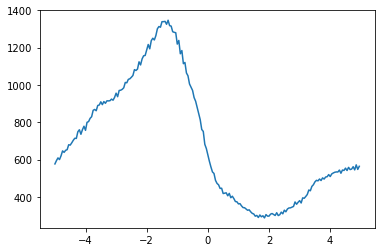

NameError: name 'mid_idx' is not defined

In [18]:


    
    #pass

64

''

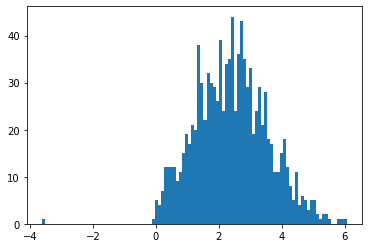

In [130]:
plt.hist(np.concatenate(direct_amplitudes),100)
''

array([ 76,  79, 145, 189, 244, 271, 368, 376, 402, 408, 489])

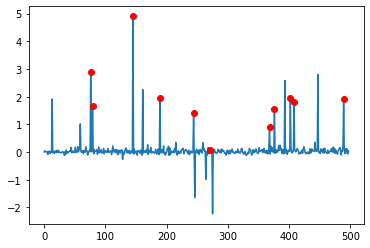

In [92]:
plt.plot(amplitudes)
plt.plot(np.where(direct_cells)[0],amplitudes[direct_cells],'ro')
#plt.ylim([-1,10])

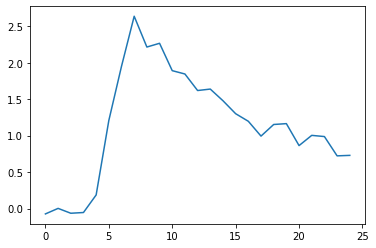

In [65]:
import matplotlib.pyplot as plt
Fstim_now.shape
plt.plot(Fstim_now[:,np.where(direct_cells)[0][3]])

In [36]:
data_dict['photostim'].keys()

dict_keys(['FstimRaw', 'Fstim', 'seq', 'favg', 'stimDist', 'stimPosition', 'centroidX', 'centroidY', 'slmDist', 'stimID', 'siHeader'])

In [ ]:
##### old canning
# import BCI_analysis, os
# local_temp_dir = '/home/jupyter/temp/' 
# metadata_dir = '/home/jupyter/bucket/Metadata/' 
# raw_scanimage_dir_base ='/home/jupyter/bucket/Data/Calcium_imaging/raw/' 
# suite2p_dir_base = '/home/jupyter/bucket/Data/Calcium_imaging/suite2p/'
# bpod_path = '/home/jupyter/bucket/Data/Behavior/BCI_exported/'
# setup = 'Bergamo-2P-Photostim'#'DOM3-MMIMS'
# save_path = "/home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba"
# fov = 'FOV_01'
# subject = 'BCI_66'
# BCI_analysis.io_suite2p.suite2p_to_npy(os.path.join(suite2p_dir_base,setup), 
#                                        os.path.join(raw_scanimage_dir_base,setup), 
#                                        os.path.join(bpod_path,setup),
#                                        save_path, 
#                                        overwrite=False, 
#                                        mice_name = subject,
#                                        fov_list = [fov],
#                                        session_list=None,#['072323'],
#                                        max_frames = 500)

FOV: FOV_01, Session Date: .ipynb_checkpoints
Session already exists at /home/jupyter/bucket/Data/Calcium_imaging/sessionwise_tba/BCI_66/BCI_66-092523-FOV_01.npy, and overwrite=False


In [4]:
# #register Z-stack
# import os
# from pathlib import Path
# subject = 'PKJ_04'
# session = '042123'
# z_stack = 'stack_00001.tif'
# os.chdir('/home/jupyter/Scripts/Suite2p_pipeline/utils/')
# import utils_imaging as utils_imaging
# local_temp_dir = '/home/jupyter/temp'
# temp_dir = os.path.join(local_temp_dir,'{}_{}_{}'.format(subject,session,z_stack[:-4]))
# Path(temp_dir).mkdir(exist_ok = True, parents = True)
# utils_imaging.register_zstack('/home/jupyter/bucket/Data/Calcium_imaging/raw/Bergamo-2P-Photostim/{}/{}/{}'.format(subject,session,z_stack) ,temp_dir)

planes: 51
(51, 100, 2, 800, 800)
(5100, 2, 800, 800)
pixel size changed from [5.4, 5.4] to 0.45442069540907865 
regstering /home/jupyter/temp/PKJ_04_042123_stack_00001/stack_00001.tif
{}
tif
** Found 1 tifs - converting to binary **
408 frames of binary, time 2.05 sec.
816 frames of binary, time 3.94 sec.
1224 frames of binary, time 5.14 sec.
1632 frames of binary, time 6.43 sec.
2040 frames of binary, time 8.59 sec.
2448 frames of binary, time 11.18 sec.
2856 frames of binary, time 13.77 sec.
3264 frames of binary, time 16.45 sec.
3672 frames of binary, time 20.01 sec.
4080 frames of binary, time 24.26 sec.
4488 frames of binary, time 28.65 sec.
4896 frames of binary, time 47.67 sec.
5304 frames of binary, time 75.08 sec.
5712 frames of binary, time 95.12 sec.
6120 frames of binary, time 117.35 sec.
6528 frames of binary, time 139.37 sec.
6936 frames of binary, time 161.87 sec.
7344 frames of binary, time 181.85 sec.
7752 frames of binary, time 203.13 sec.
8160 frames of binary, time